# ML MAJOR PROJECT




# EXPLORATORY DATA ANALYSIS

![image.png](attachment:image.png)

<b>Problem Statement:</b> we will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.


importing all required libraries to move forward

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we are reading excel file which is present in downloads section and where we have to do EDA,data preprocessing and handling Null values and many more stuff

by creating our dataframe as <b>prices</b>

In [ ]:
prices=pd.read_excel('Data_Train.xlsx',Sheetname='Sheet1')

let us check the head of our dataframe prices

In [ ]:
prices.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
prices.info() #info() will give you all column names,total values and datatype of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


<h1>We have 2 types of variables.</h1>
<ol>
<li>Numerical variables : which contains number as values</li>
<li>Categorical variables : which contains descriptions of groups or things.</li>
    </ol>
<p>In this Data set,

Numerical Variables are Year,Kilometers_Driven,Seats,Price.

Categorical Variables are except numeric all are categorical</p>

In [ ]:
prices.describe() #all numeric columns statistics will be evaluated

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
prices.shape# checking how many rows and columns are present in our dataframe.

(6019, 12)

In [ ]:
prices.isnull().sum() #it shows the count of null values in each column

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

from above,we observe that in features Engine,Power,Seats,prices there are some missing values

we have to handle this null values by performing some methods like imputation,one hot encoding,label encoding etc..

In [ ]:
prices.columns.tolist() #list of columns

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [ ]:
prices.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

# DATA PREPROCESSING

In [ ]:
prices['Seats'] = prices['Seats'].fillna(5)

In [ ]:
prices.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

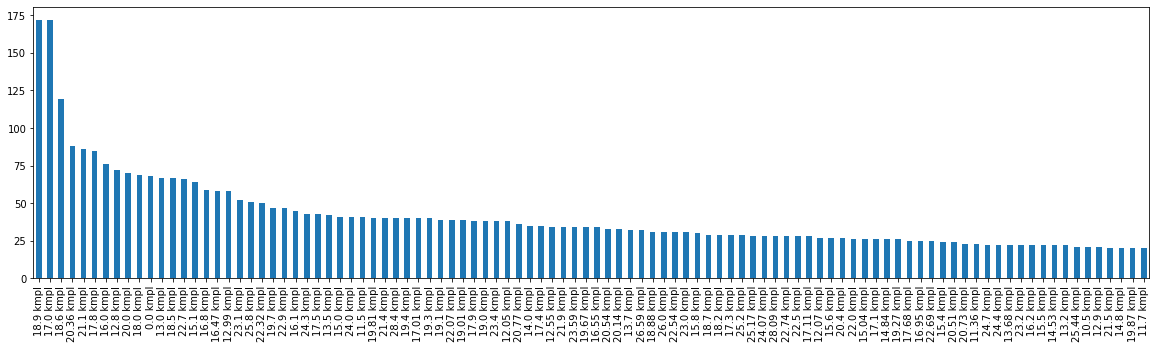

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
prices['Mileage'].value_counts().head(100).plot.bar()
plt.show()

In [ ]:
prices['Mileage'] = prices['Mileage'].fillna('17.0 kmpl')
prices['Mileage'] = prices['Mileage'].replace('0.0 kmpl','17.0 kmpl')

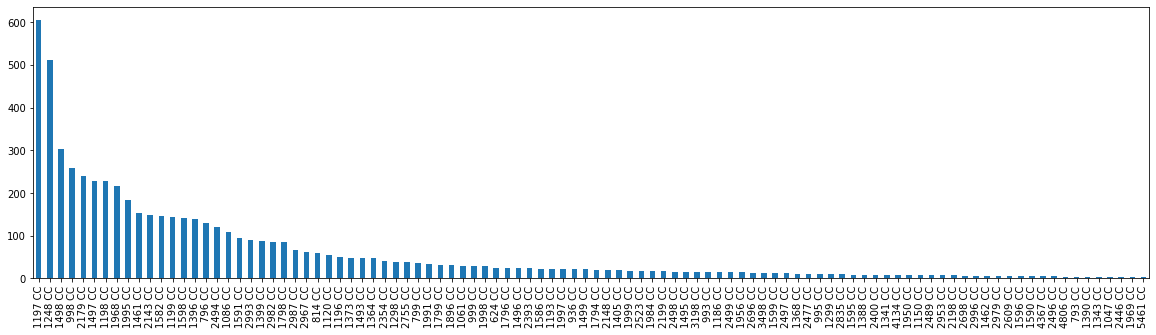

In [ ]:
plt.figure(figsize=(20,5))
prices['Engine'].value_counts().head(100).plot.bar()
plt.show()

In [ ]:
prices['Engine']=prices['Engine'].fillna('1197 CC')

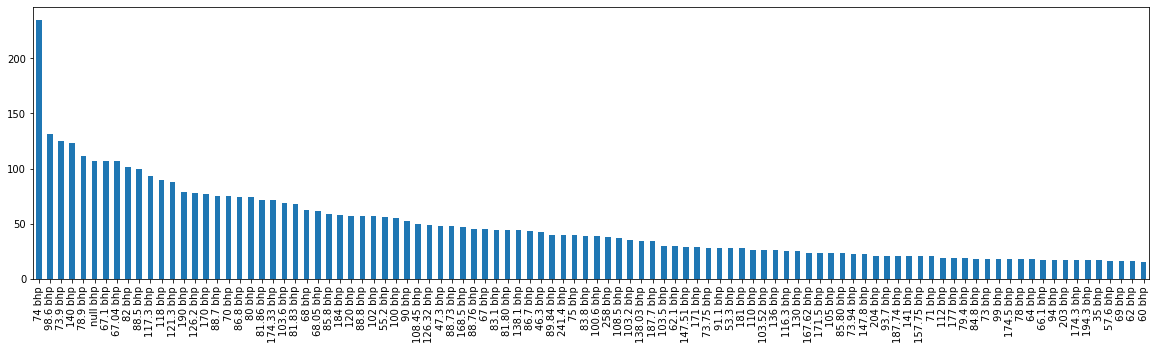

In [ ]:
plt.figure(figsize=(20,5))
prices['Power'].value_counts().head(100).plot.bar()
plt.show()

In [ ]:
prices['Power']=prices['Power'].fillna('74 bhp')
prices['Power']=prices['Power'].replace('null bhp''74 bhp')

In [ ]:
prices['Mileage'] = prices['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
prices['Engine'] = prices['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
prices['Power'] = prices['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [ ]:
prices.isnull().sum() #null values have been imputed

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [ ]:
prices['Name'] = prices.Name.str.split().str.get(0)

In [ ]:
prices.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# EDA ON PRICES DATA

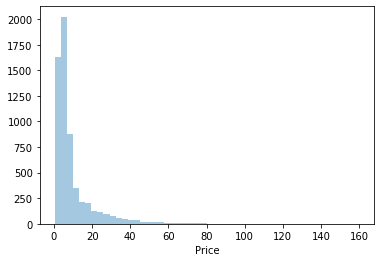

In [ ]:
sns.distplot(prices['Price'],kde=False)

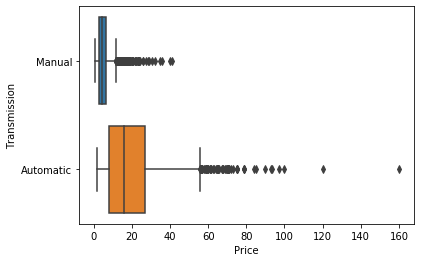

In [ ]:
sns.boxplot(y = 'Transmission', x = 'Price', data = prices)


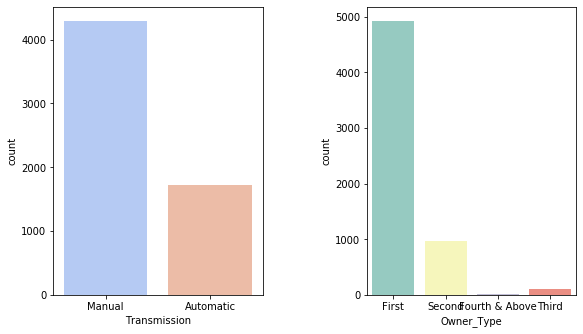

In [ ]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(132)
sns.countplot(x='Transmission',data=prices,palette='coolwarm')
plt.subplot(133)
sns.countplot(x='Owner_Type',data=prices,palette='Set3')


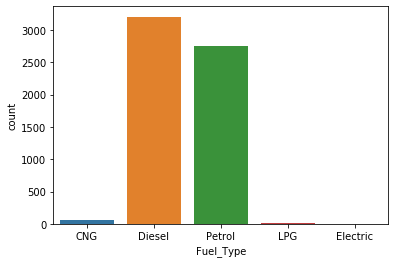

In [ ]:
sns.countplot(prices['Fuel_Type'])

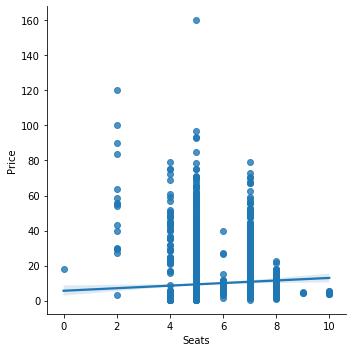

In [ ]:
sns.lmplot('Seats', 'Price',data=prices,order=1)

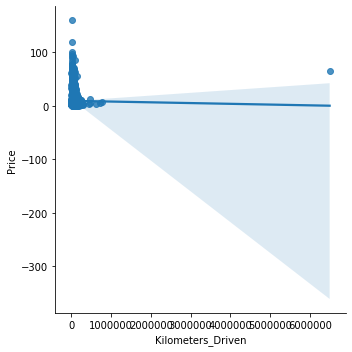

In [ ]:
sns.lmplot('Kilometers_Driven' ,  'Price' , data=prices, order=1)

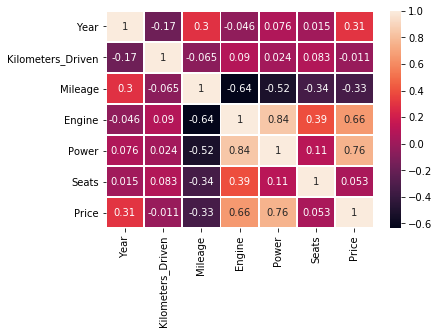

In [ ]:
sns.heatmap(prices.corr(),annot=True, linewidths=.9)

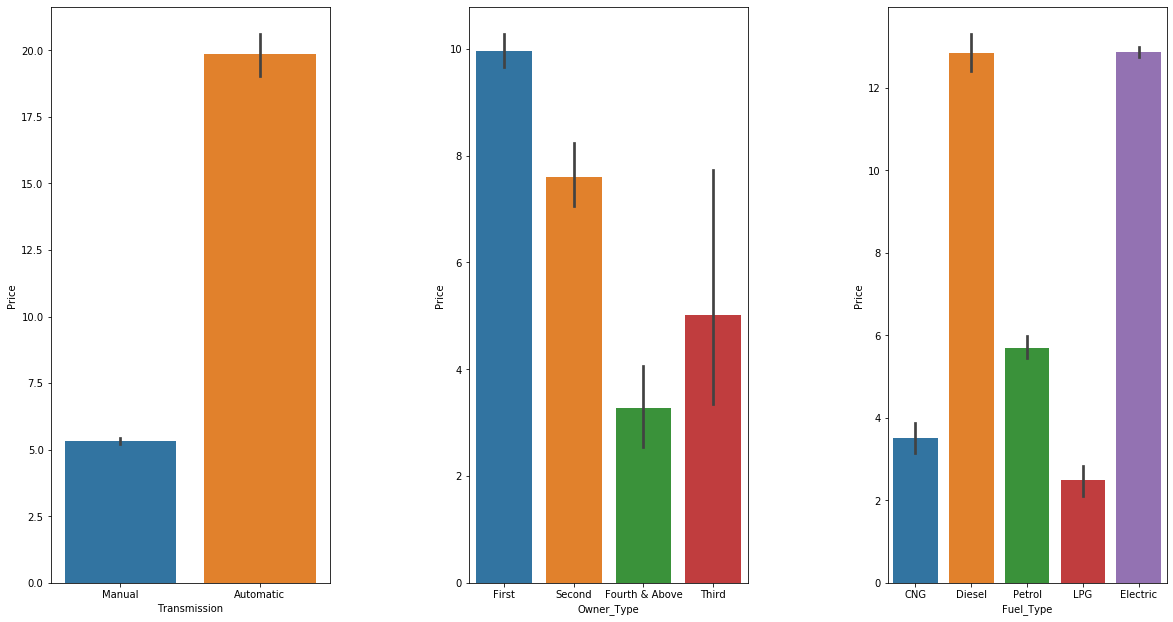

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
sns.barplot(x='Transmission',y='Price',data=prices)
plt.subplot(132)
sns.barplot(x='Owner_Type',y='Price',data=prices)
plt.subplot(133)
sns.barplot(x='Fuel_Type',y='Price',data=prices)

# <b>Observations</b>


<ol>
  <li>the price of cars with Automatic Transmission are more than Manual</li>
    <li>owner type 'First' are more price</li>
    <li>fueltype 'Diseal' and 'Electric' are more costlier cars</li>

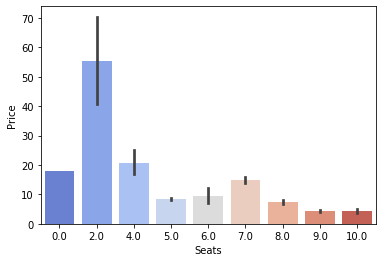

In [ ]:
sns.barplot(x='Seats',y='Price',data=prices,palette='coolwarm')

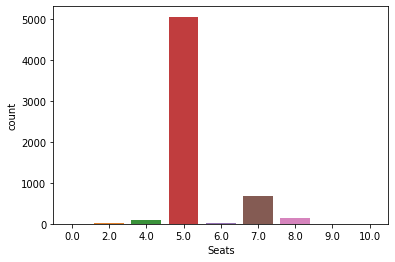

In [ ]:
sns.countplot(prices['Seats'])

we have maximum cars with Seats 5

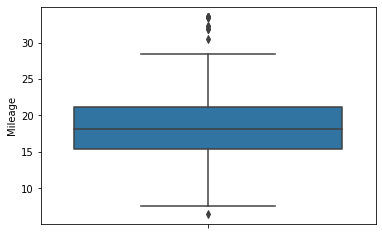

In [ ]:
sns.boxplot(y='Mileage',data=prices)

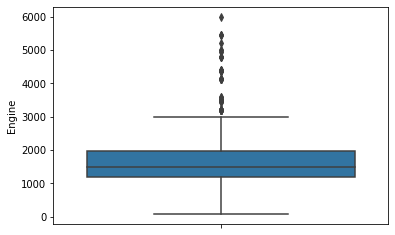

In [ ]:
sns.boxplot(y='Engine',data=prices)

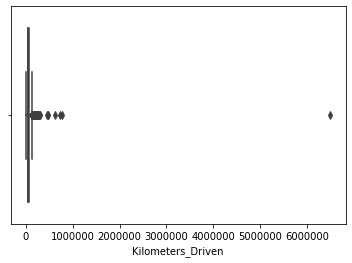

In [ ]:
sns.boxplot(x='Kilometers_Driven',data=prices)

# LABEL ENCODING AND ONE-HOT-ENCODING

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form and it assigns a unique number(starting from 0) to each class of data.

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [ ]:
prices['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
# Encode labels in column 'Fuel_Type'. 

prices['Fuel_Type']= label_encoder.fit_transform(prices['Fuel_Type']) 
  
prices['Fuel_Type'].unique() 

array([0, 1, 4, 3, 2])

In [ ]:
prices['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
# Encode labels in column 'Owner_Type'. 

prices['Owner_Type']= label_encoder.fit_transform(prices['Owner_Type']) 
  
prices['Owner_Type'].unique() 

array([0, 2, 1, 3])

In [ ]:
prices['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
# Encode labels in column 'Transmission'. 

prices['Transmission']= label_encoder.fit_transform(prices['Transmission']) 
  
prices['Transmission'].unique() 

array([1, 0])

In [ ]:
prices['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [ ]:
# Encode labels in column 'Name'. 

prices['Name']= label_encoder.fit_transform(prices['Name']) 
  
prices['Name'].unique() 

array([18, 10,  9,  1, 22, 28, 29, 27, 16, 21, 24, 19,  2, 17,  8, 23,  5,
       13, 30,  4, 25, 20,  6, 14, 26,  0, 12, 11,  7,  3, 15])

In [ ]:
prices['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [ ]:
# Encode labels in column 'Year'. 

prices['Year']= label_encoder.fit_transform(prices['Year']) 
  
prices['Year'].unique() 

array([12, 17, 13, 14, 15, 18, 20, 16, 19,  9, 11, 10, 21,  8,  7,  6,  4,
        2,  5,  1,  3,  0], dtype=int64)

In [ ]:
prices['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
# Encode labels in column 'Location'. 

prices['Location']= label_encoder.fit_transform(prices['Location']) 
  
prices['Location'].unique() 

array([ 9, 10,  2,  3,  5,  6,  7,  8,  4,  1,  0])

# FEATURE SCALING 

In [ ]:
#Scaling Kilometers_Driven column using minmax scaler

from sklearn.preprocessing import MinMaxScaler

kilometers = prices['Kilometers_Driven']
kilometers_matrix = kilometers.values.reshape(-1,1)

scaler = MinMaxScaler()
kilometers_scaled = scaler.fit_transform(kilometers_matrix)

In [ ]:
prices['Kilometers_Driven']=kilometers_scaled

In [ ]:
prices.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,18,9,12,0.011051,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,10,17,0.006282,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,9,2,13,0.007051,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,18,2,14,0.013359,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,3,15,0.006231,1,0,2,15.20,1968.0,140.80,5.0,17.74


# TRAIN TEST SPLIT

In [ ]:
X=prices.drop(['Price'],axis=1)
Y=prices['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test,predictions)

0.6807714548408934

In [ ]:
import xgboost as xgb
my_model = xgb.XGBRegressor(n_estimators=1000,learning_rate = 0.1)

In [ ]:
my_model.fit(X_train, Y_train) 
             

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
predictions1 = my_model.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test,predictions1)

0.9004583435311481